In [5]:
import sys
sys.path.append("../src/")

from classic_pid_controller import ClassicPidController
from neural_pid_controller import NeuralPidController
from bathtub import Bathtub
from cournot import CournotCompetition
from rabbits import Rabbits
from consys import ConSys
from plot_utils import plot_classic_pid, plot_nn_pid

In [6]:
# Controller config
c_config = {
    'classic': {
       'pid_params': [0.1, 0.1, 0.1] #kp, ki, kd
    },
    'nn' : {
        'hidden_layers': [4,4,4],
        'activation_funcs': ["tanh", "tanh", "tanh"],
        'min_weight_value' : -0.01,
        'max_weight_value' : 0.01,
        'seed': None
    }
}

# Plant config
p_config = {
    'bathtub': {
        'area': 10.0,
        'drain_area': 0.2,
        'initial_height': 10.0,
        'gravity_constant' : 9.8
    },
    'cournot': {
        'target_profit': 0.6,
        'marginal_unit_cost': 0.1,
        'own_quantity': 0.0,
        'competitor_quantity': 0.3,
        'maximum_price': 2.0
    },
    'rabbits': {
        'a1': 0.35,     # rabbit birth rate
        'a2': 0.01,     # rabbit natural death rate
        'a3': 0.05,     # rabbit killed by fox rate
        'a4': 0.3,      # rabbit external birthrate factors param 1
        'a5': 0.4,      # rabbit external birthrate factors param 2
        'b1': 0.3,      # fox natural death rate
        'b2': 0.015,    # fox birthrate
        'rabbit_start_population': 26,
        'fox_start_population': 3
    }
}

# ConSys config
cs_config = {
    'epochs': 50,
    'timesteps_per_epoch': 10,
    'learning_rate': 0.1,
    'min_noise_value': -0.02,
    'max_noise_value': 0.02
}

In [7]:
def simulate(controller_type, plant_type, verbose=False):
    
    # Initialize controller
    if controller_type == 'classic':
        controller = ClassicPidController()
        pid_params = c_config['classic']['pid_params']
    elif controller_type == 'nn':
        controller = NeuralPidController(**c_config['nn'])
    else:
        raise ValueError(f"Unsupported controller type: {controller_type}")

    # Initialize plant
    plant_params = p_config[plant_type]
    if plant_type == 'bathtub':
        plant = Bathtub(**plant_params)
    elif plant_type == 'cournot':
        plant = CournotCompetition(**plant_params)
    elif plant_type == 'rabbits':
        plant = Rabbits(**plant_params)
    else:
        raise ValueError(f"Unsupported plant type: {plant_type}")

    # Initialize ConSys
    consys = ConSys(controller, plant, **cs_config)
    
    # run simulation
    if controller_type == 'classic':
        mse_list, params_matrix = consys.simulate(pid_params, verbose=verbose)
        plot_classic_pid(mse_list, params_matrix)
    elif controller_type == 'nn':
        mse_list = consys.simulate(verbose=verbose)
        plot_nn_pid(mse_list)


Epoch 0  mse:  2.7398994
Epoch 1  mse:  2.3739395
Epoch 2  mse:  2.0621235
Epoch 3  mse:  1.7706317
Epoch 4  mse:  1.5294861
Epoch 5  mse:  1.3325274
Epoch 6  mse:  1.1634024
Epoch 7  mse:  0.9971976
Epoch 8  mse:  0.8633129
Epoch 9  mse:  0.7471218
Epoch 10  mse:  0.6536449
Epoch 11  mse:  0.5580633
Epoch 12  mse:  0.48352575
Epoch 13  mse:  0.4191765
Epoch 14  mse:  0.36462834
Epoch 15  mse:  0.30865875
Epoch 16  mse:  0.2714746
Epoch 17  mse:  0.2359563
Epoch 18  mse:  0.19908552
Epoch 19  mse:  0.17330715
Epoch 20  mse:  0.15177973
Epoch 21  mse:  0.12999952
Epoch 22  mse:  0.111810684
Epoch 23  mse:  0.0963656
Epoch 24  mse:  0.0850427
Epoch 25  mse:  0.07310074
Epoch 26  mse:  0.062707245
Epoch 27  mse:  0.053593237
Epoch 28  mse:  0.04593559
Epoch 29  mse:  0.041102923
Epoch 30  mse:  0.03338219
Epoch 31  mse:  0.030110722
Epoch 32  mse:  0.024627788
Epoch 33  mse:  0.021253606
Epoch 34  mse:  0.019419083
Epoch 35  mse:  0.015936721
Epoch 36  mse:  0.013618365
Epoch 37  mse:  0.

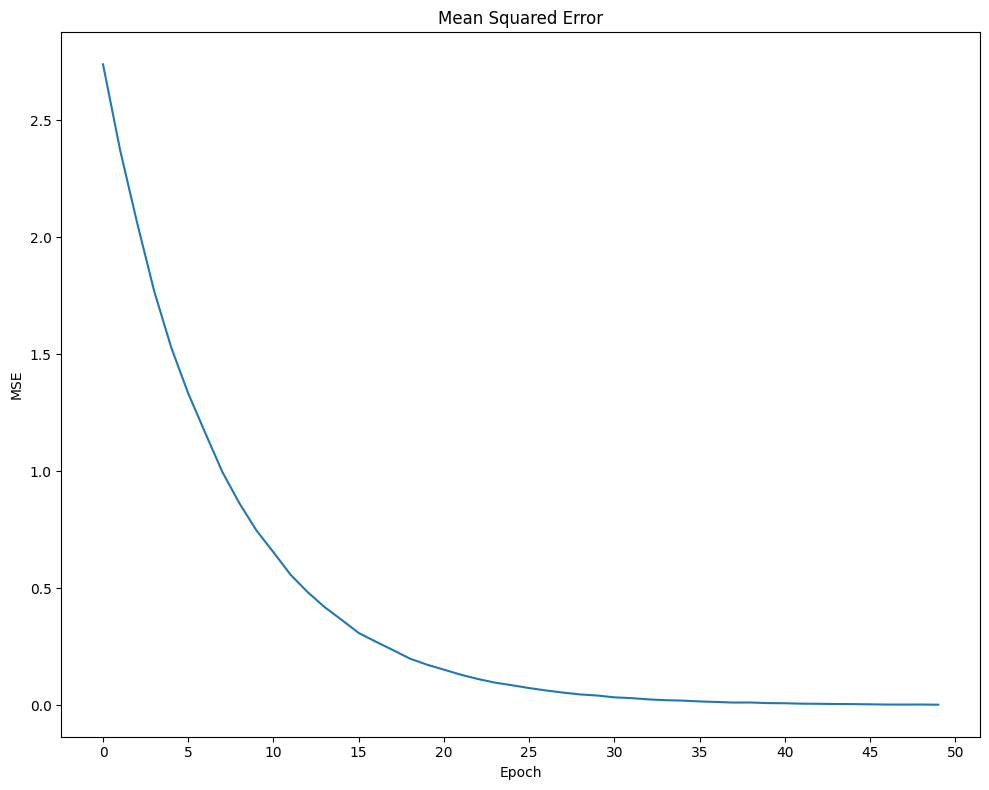

In [8]:
simulate('nn', 'bathtub', verbose=True)